<a href="https://colab.research.google.com/github/bahmanravaei/Ising-oneDimensionalSequential/blob/main/Simulated_DA_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple and Sequential Python Code for Ising Model

## Import some module

In [1]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty
from timeit import timeit
from numpy.random import rand, randint, seed


## Set the Configuration Parameter

In [2]:

L = 1024           # Number of State variables
#L = 200

#kB = 1.0         # Boltzman constant

seed(10)
# help( randint )

T = 1.0           # temperature
n = 10000         # the number of Monte Carlo time steps
P = 100           # sorta like 1000 milliseconds in a second

## Initialize bias term

Randomly initialize bias term

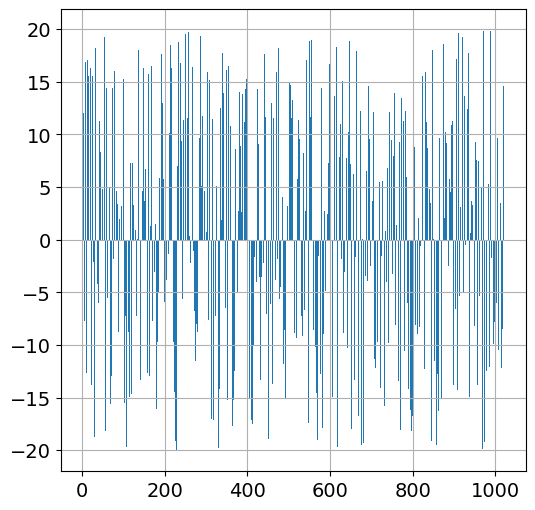

In [3]:
from numpy.ma.core import zeros

def initB(L):
  B=randint(minB, maxB, size=L)
  return B/10.0

minB=-200
maxB=200
B=initB(L)
plt.bar(range(L),B)
plt.show()

## Initialize connection weight

Randomly initialize connection weight

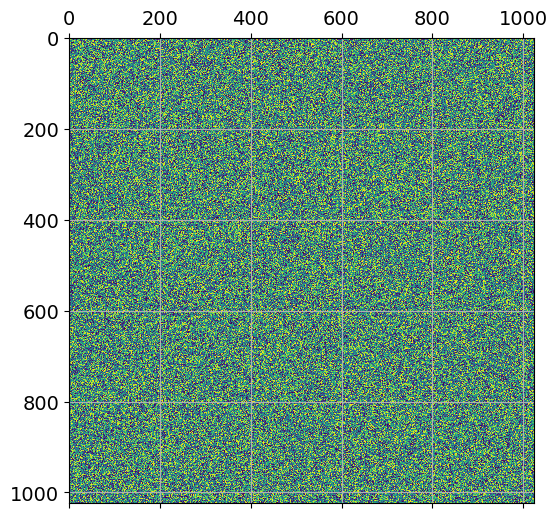

In [4]:

def initW(minW, maxW,L):
  W=randint(minW, maxW, size=(L,L))

  return W/10.0

minW=-200
maxW=200
W = initW(minW, maxW, L)
W.shape
plt.matshow(W)

## Create vector of state varialble

In [5]:
def createVector( L ) :
    """
        Creates a vector of length of L of random spins, $X_{i} = \pm 1$.
        Value for each state is 0 and 1
    """
    #return ( rand( L) < 0.5 ) * 2 - 1   #        Value for each state is -1 and 1
    return ( rand( L) < 0.5 ) * 1        #        Value for each state is 0 and 1

### Ilustration of state values

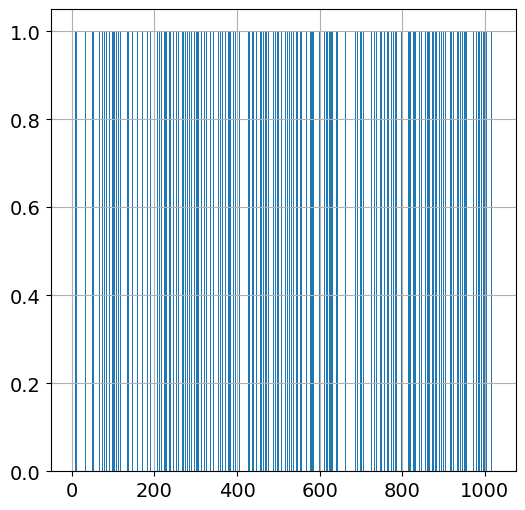

In [6]:
X = createVector( L )
plt.bar(range(L),X)
plt.show()

## Define Function for Energy and deltaEnergy

In [7]:
def energy(W, X ) :

    E = np.matmul(np.matmul(W, X.transpose()), X)
    E= E+ np.matmul(X.transpose(), B)
    return - E
    #return -W * ( np.sum( s[0:L-1,:] * s[1:L,:] ) + np.sum( s[:,0:L-1] * s[:,1:L] ) )

def magnetization( X ) :
    return np.sum( X ) / L

In [8]:
def deltaEnergy(X,i):
  row_i=W[i]
  h_i=(np.matmul(row_i, X.transpose())+B[i])
  delta=-1*(1-2*X[i])*h_i
  return delta



### Illustration of effect of fliping each bit on Energy of Ising Model

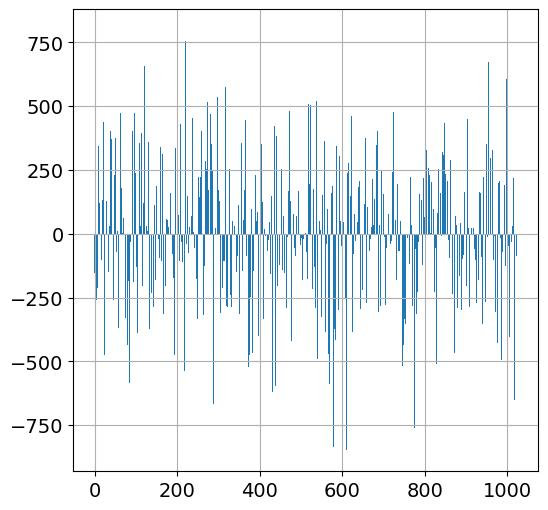

In [9]:
D=zeros(L)
for i in range(L):
  D[i]=deltaEnergy(X,i)
plt.bar(range(L),D)
plt.show()

## MCMC (metropolis method)
Must be parallel and do it for all bit Concurrently

In [10]:
def metropolis( X, oldE ) :
    # flip a random spin and calculate $dE$
    i = randint( L )
    deltaE = deltaEnergy(X,i)
    X[i] = 1-X[i]    # flip the i spin
    E = energy(W, X )
    deltaE = E - oldE

    # these are the Metropolis tests
    if deltaE < 0 :
        # keep the flipped spin because it lowers the energy
        E = energy(W, X )
        return X, E
    deltaOverT=np.float128(- deltaE / T)
    np.exp(deltaOverT)
    if rand() < np.exp(deltaOverT) :
        #return 1/0
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        E = energy(W, X )
        return X, E

    # the spin flip is rejected
    X[i] = 1-X[i]    # flip the ij spin back
    E = oldE        # and keep the old energy
    return X, E

## Define the Ising Function for calling metropolis function

In [11]:
def ising( X, n, T ) :
    """
        Runs the Metropolis algorithm $n$ times on the lattice $X_{i}$.
    """
    M = np.zeros( n )         # used to store the magnetizations, $M(t)$
    E = np.zeros( n )         # used to store the energy, $E(t)$
    E[0] = energy( W , X )
    M[0] = magnetization( X )
    percent=int(n/20)
    #print(percent)
    for t in range( 1, n ) :     # $t$ is our pseudo-time
        X, E[t] = metropolis( X, E[t-1] )
        M[t] = magnetization( X )
        #if t%percent==0:
          #print ((t/percent)*5)
          #if E[t]-E[t-percent+1]<0.000001:
           # break
    return M, E

### Calling Ising function

In [12]:


M, E = ising( X, n, T )



### Effect of N iteration of metropolis algorithm on Ising model state

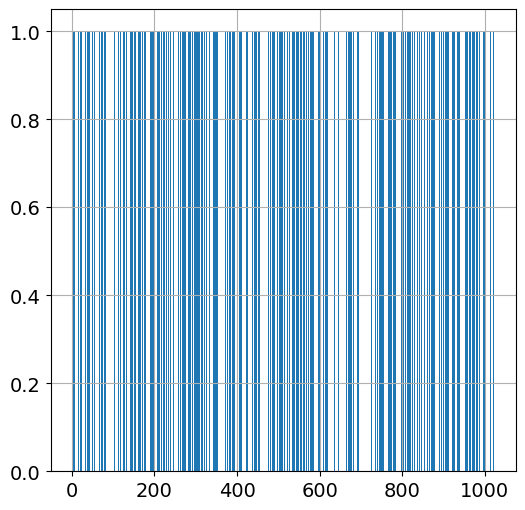

563

In [13]:
plt.bar(range(L),X)
plt.show()
np.sum(X)

## Plot the energy and magnetism of model after each iteration of Metropolis algorithm

# Plot the magnetism of model

Text(0, 0.5, '$M$')

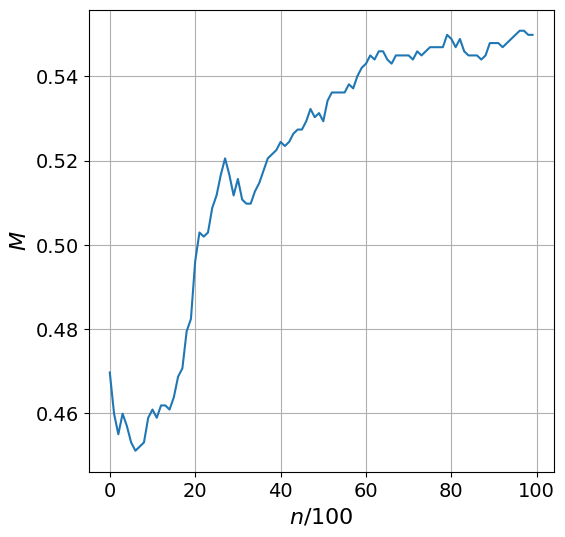

In [14]:
plt.plot( M[::P] )  # only plot every P-th point
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$M$' )

# Plot the energy of model

Text(0, 0.5, '$E$')

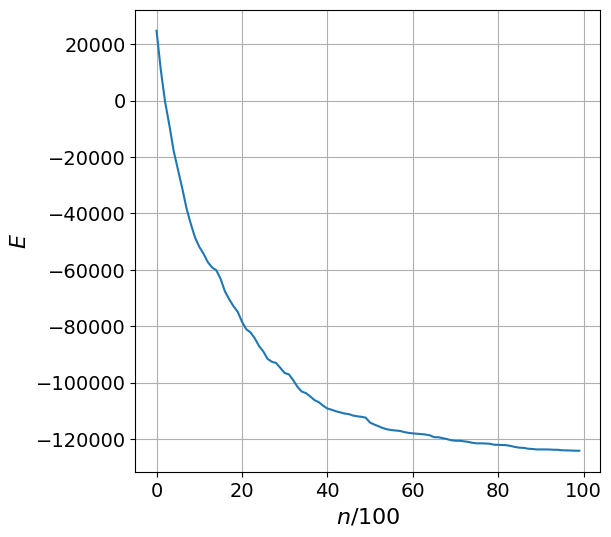

In [15]:
plt.plot( E[::P] )  # only plot every P-th point
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$E$' )

## Run the Ising model for five different Temprature scenario

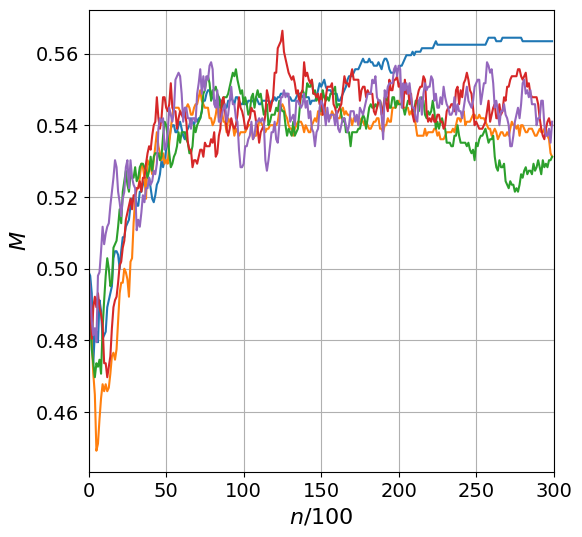

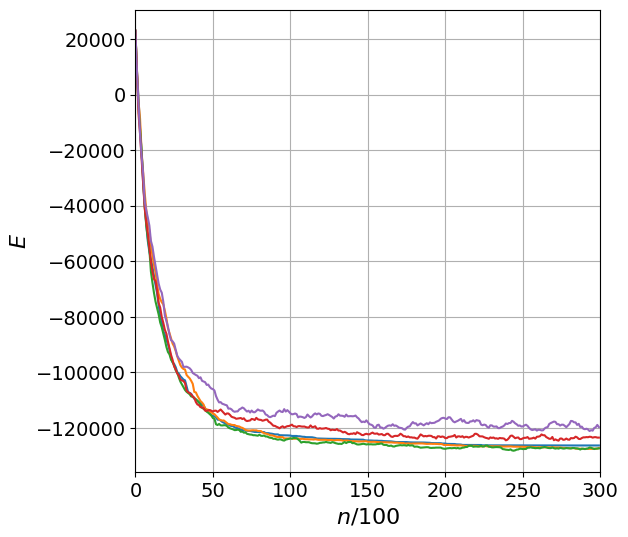

In [16]:
n = 30000               # increase the number of Monte Carlo time steps

fig, ax = plt.subplots()
ax.set_xlim( [ 0, n/P ] )
#ax.set_ylim( [-0.1, 1.1 ] )
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$M$' )

fig2, ax2 = plt.subplots()
ax2.set_xlim( [ 0, n/P ] )
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$E$' )
New_X = createVector( L )

for T in range(1,100,20 ) :   # run the experiment 5 times
    X=np.copy(New_X)
    M, E = ising( X, n, T )
    ax.plot( M[::P] )    # only plot every P-th point
    ax2.plot(E[::P])

#ax.plot( [0,n], [0,0] )

